In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing import image
from random import shuffle
from livelossplot import PlotLossesKeras
from sklearn.metrics import log_loss, accuracy_score
import cv2

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications import xception
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

C:\Users\Wallace\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#windows path
DATASET_DIR = " "#path of the dataset
TRAIN_DIR = DATASET_DIR+"\\train"
TEST_DIR = DATASET_DIR+"\\test"
TRAIN_LABEL = DATASET_DIR+"\\labels.csv"

DATASET_MULTICLASS_DIR = DATASET_DIR+"\\dataset_multiclass"
TRAIN_SET_DIR = DATASET_DIR+"\\train_set"
VAL_SET_DIR = DATASET_DIR+"\\val_set"
TEST_SET_DIR = DATASET_DIR+"\\test_set"

In [3]:
df_train = pd.read_csv(TRAIN_LABEL)
breeds = df_train.breed.unique()
breeds = np.sort(breeds)
dict_breeds = dict(zip(breeds, range(breeds.shape[0])))

In [6]:
def extract_features(DIR, n_total_images, n_features, size_img, conv):
    i = 0
    label = 0
    features = np.zeros(shape=(n_total_images, n_features))
    labels = np.zeros(shape=(n_total_images, 1))
    for root, dirs, files in os.walk(DIR):
        for dirname in tqdm(sorted(dirs)):
            filelist = os.listdir(DIR+'\\'+dirname)
            filelist = np.asarray(filelist)
            for filename in filelist:
                img_path = DIR+'\\'+dirname+'\\'+filename
                img = image.load_img(img_path, target_size=(size_img, size_img))
                
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
                
                features[i,:] = conv.predict(x)
                labels[i] = label
                i = i+1
            label = label+1
    print(label)            
    return features, labels

In [5]:
def read_images(DIR, n_total_images, size_img):
    i = 0
    label = 0
    features = np.zeros(shape=(n_total_images, size_img*size_img))
    labels = np.zeros(shape=(n_total_images, 1))
    for root, dirs, files in os.walk(DIR):
        for dirname in tqdm(sorted(dirs)):
            filelist = os.listdir(DIR+'\\'+dirname)
            filelist = np.asarray(filelist)
            for filename in filelist:
                img_path = DIR+'\\'+dirname+'\\'+filename
                img = cv2.imread(img_path, 0)               
                img = cv2.resize(img, (size_img, size_img)) 

                features[i,:] = img.reshape(1,size_img*size_img)
                labels[i] = label
                
                i = i+1
            label = label+1
    print(label)            
    return features, labels

In [6]:
train_features, train_labels = read_images(TRAIN_SET_DIR, 6547, 200)
print(train_features.shape, train_labels.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:35<00:00,  3.35it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [0

120
(6547, 40000) (6547, 1)


In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_features)

(6547, 2)


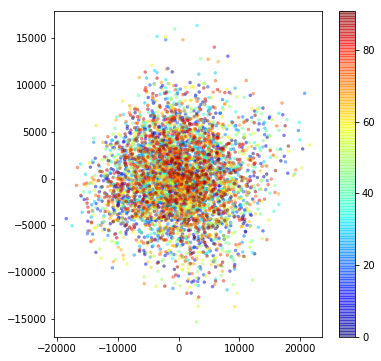

In [40]:
print(pca_result.shape)
train_labels = train_labels.reshape(6547)
plt.figure(figsize=(6, 6))
plt.scatter(pca_result[:5000, 0], pca_result[:5000, 1], c=train_labels[:5000], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 120), s=12)
plt.colorbar()
plt.show()


In [9]:
X_embedded = TSNE(n_components=2).fit_transform(train_features)
print(X_embedded.shape)

(6547, 2)


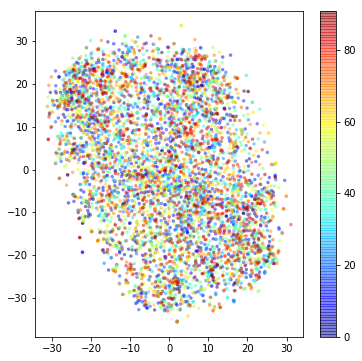

In [39]:
plt.figure(figsize=(6, 6))
plt.scatter(X_embedded[:5000, 0], X_embedded[:5000, 1], c=train_labels[:5000], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 120), s=12)
plt.colorbar()
plt.show()

In [11]:
dict_breeds = dict(zip(breeds, range(breeds.shape[0])))

In [47]:
breed1 = dict_breeds["dandie_dinmont"]
breed2 = dict_breeds["chihuahua"]

index1 = train_labels == breed1
index2 = train_labels == breed2
#print(index1.shape)
x_breed1 = X_embedded[index1, :]
x_breed2 = X_embedded[index2, :]

y_breed1 = train_labels[index1]
y_breed2 = train_labels[index2]

In [48]:
print(x_breed1.shape, x_breed2.shape)
print(y_breed1.shape, y_breed2.shape)

(57, 2) (45, 2)
(57,) (45,)


In [49]:
xstack = np.vstack((x_breed1,x_breed2))
print(xstack.shape)
ystack = np.vstack((y_breed1.reshape(57,1),y_breed2.reshape(45,1)))
ystack = ystack.reshape(102)
print(xstack.shape, ystack.shape)


(102, 2)
(102, 2) (102,)


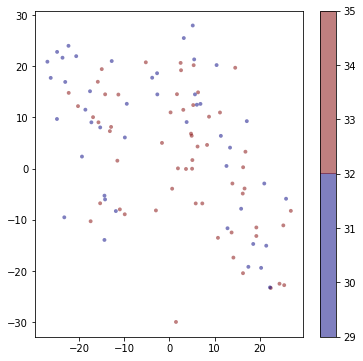

In [51]:
plt.figure(figsize=(6, 6))
plt.scatter(xstack[:, 0], xstack[:, 1], c=ystack[:], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 2), s=15)
plt.colorbar()
plt.show()

### Visualizing Features

In [4]:
size_img = 300
conv_model = InceptionV3(include_top = False, weights='imagenet', input_shape=(size_img, size_img, 3), pooling="avg")

In [7]:
n_features = 2048
train_features, train_labels = extract_features(TRAIN_SET_DIR, 6547, n_features, size_img, conv_model)

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [04:27<00:00,  2.23s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [0

120


In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_features)

(6547, 2)


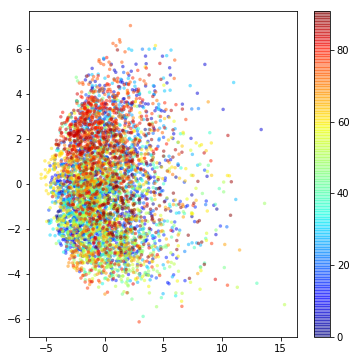

In [9]:
print(pca_result.shape)
train_labels = train_labels.reshape(6547)
plt.figure(figsize=(6, 6))
plt.scatter(pca_result[:5000, 0], pca_result[:5000, 1], c=train_labels[:5000], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 120), s=12)
plt.colorbar()
plt.show()


In [10]:
X_embedded = TSNE(n_components=2).fit_transform(train_features)
print(X_embedded.shape)

(6547, 2)


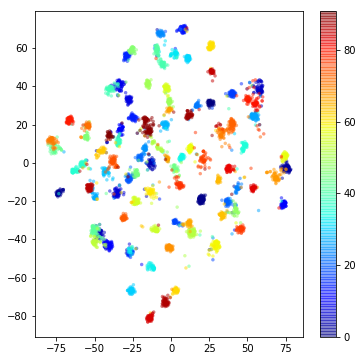

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(X_embedded[:5000, 0], X_embedded[:5000, 1], c=train_labels[:5000], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 120), s=12)
plt.colorbar()
plt.show()

In [12]:
dict_breeds = dict(zip(breeds, range(breeds.shape[0])))

In [14]:
breed1 = dict_breeds["dandie_dinmont"]
breed2 = dict_breeds["chihuahua"]

index1 = train_labels == breed1
index2 = train_labels == breed2
#print(index1.shape)
x_breed1 = X_embedded[index1, :]
x_breed2 = X_embedded[index2, :]

y_breed1 = train_labels[index1]
y_breed2 = train_labels[index2]

xstack = np.vstack((x_breed1,x_breed2))
print(xstack.shape)
ystack = np.vstack((y_breed1.reshape(57,1),y_breed2.reshape(45,1)))
ystack = ystack.reshape(102)
print(xstack.shape, ystack.shape)

(102, 2)
(102, 2) (102,)


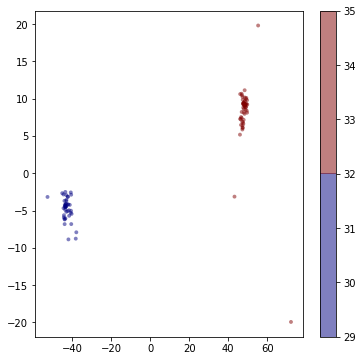

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(xstack[:, 0], xstack[:, 1], c=ystack[:], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 2), s=15)
plt.colorbar()
plt.show()

In [28]:
breed1 = dict_breeds["appenzeller"]
breed2 = dict_breeds["bernese_mountain_dog"]

index1 = train_labels == breed1
index2 = train_labels == breed2
#print(index1.shape)
x_breed1 = X_embedded[index1, :]
x_breed2 = X_embedded[index2, :]

y_breed1 = train_labels[index1]
y_breed2 = train_labels[index2]

xstack = np.vstack((x_breed1,x_breed2))
print(y_breed1.shape,y_breed2.shape)
ystack = np.vstack((y_breed1.reshape(y_breed1.shape[0],1),y_breed2.reshape(y_breed2.shape[0],1)))
ystack = ystack.reshape(123)
print(xstack.shape, ystack.shape)

(50,) (73,)
(123, 2) (123,)


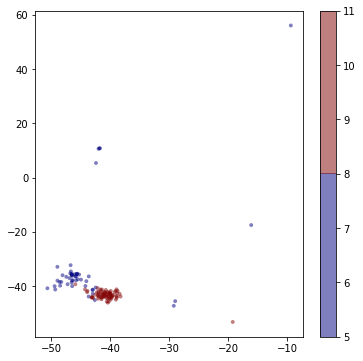

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(xstack[:, 0], xstack[:, 1], c=ystack[:], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 2), s=15)
plt.colorbar()
plt.show()